# Mall customers

  # **unsupervised machine learning**
  # Unsupervised machine learning techniques are incredibly useful in understanding and segmenting mall customers based on their behaviors, preferences, and demographics. Here's a step-by-step approach to utilizing unsupervised learning in analyzing mall customers

In [50]:
import pandas as pd

import numpy as pn

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [51]:
data=pd.read_csv(r'Mall_Customers.csv')

# Explore data

In [52]:
#data.head(5)
data.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
39,40,Female,20,37,75
173,174,Male,36,87,92
132,133,Female,25,72,34
79,80,Female,49,54,42
20,21,Male,35,24,35


In [53]:
data.shape

(200, 5)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [55]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [56]:
data.duplicated().sum()

0

In [57]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# TRANSFORM OBJECT DATA

In [58]:
from sklearn.preprocessing import LabelEncoder 
la=LabelEncoder()
data1=data.select_dtypes(include='object')
data2=data.select_dtypes(exclude='object')
for i in range (0,data1.shape[1]):
    data1.iloc[:,i]=la.fit_transform(data1.iloc[:,i])
    data=pd.concat([data1,data2],axis=1)
    data

In [59]:
data

,Genre,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,1,2,21,15,81
2,0,3,20,16,6
3,0,4,23,16,77
4,0,5,31,17,40
...,...,...,...,...,...
195,0,196,35,120,79
196,0,197,45,126,28
197,1,198,32,126,74
198,1,199,32,137,18


# create module

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
LA=StandardScaler()

In [62]:
LA.fit_transform(data[['Age','Annual Income (k$)','Spending Score (1-100)']])

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [63]:
x=[]
j=[]

In [64]:
for i in  range(1,10):
    model=KMeans(n_clusters=i)
    model.fit(XDATA)
    model.inertia_
    x.append(i)
    j.append(model.inertia_)

In [65]:
x

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [66]:
j

[600.0,
 389.3861889564371,
 295.2122461555488,
 205.22514747675922,
 168.24758017556837,
 133.86833362685582,
 117.01155455889811,
 104.02116700198584,
 92.32276967020599]

In [67]:
pd.DataFrame(x,j)

,0
600.000000,1
389.386189,2
295.212246,3
205.225147,4
168.247580,5
133.868334,6
117.011555,7
104.021167,8
92.322770,9


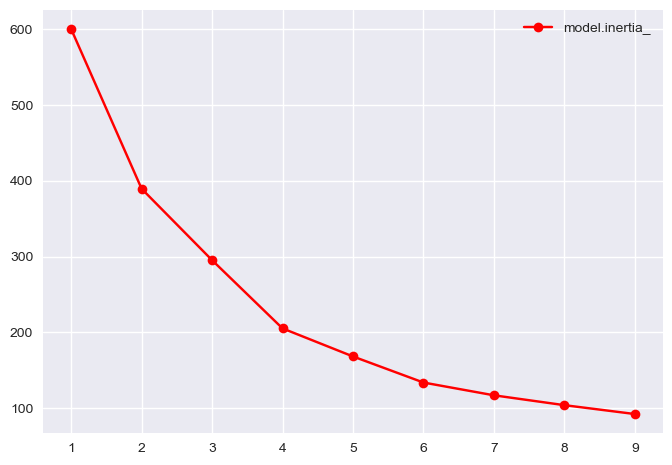

In [68]:
plt.plot(x,j,marker='o',color='red',label='model.inertia_')
plt.legend()
plt.style.use('seaborn')

In [69]:
modal=KMeans(n_clusters=4)
modal.fit(data)
pre=modal.predict(data)

In [70]:
data['k_means']=pre

In [71]:
data

,Genre,CustomerID,Age,Annual Income (k$),Spending Score (1-100),k_means
0,1,1,19,15,39,1
1,1,2,21,15,81,1
2,0,3,20,16,6,1
3,0,4,23,16,77,1
4,0,5,31,17,40,1
...,...,...,...,...,...,...
195,0,196,35,120,79,3
196,0,197,45,126,28,0
197,1,198,32,126,74,3
198,1,199,32,137,18,0


In [72]:
df1=data[data['k_means']==0]
df2=data[data['k_means']==1]
df3=data[data['k_means']==2]
df4=data[data['k_means']==3]

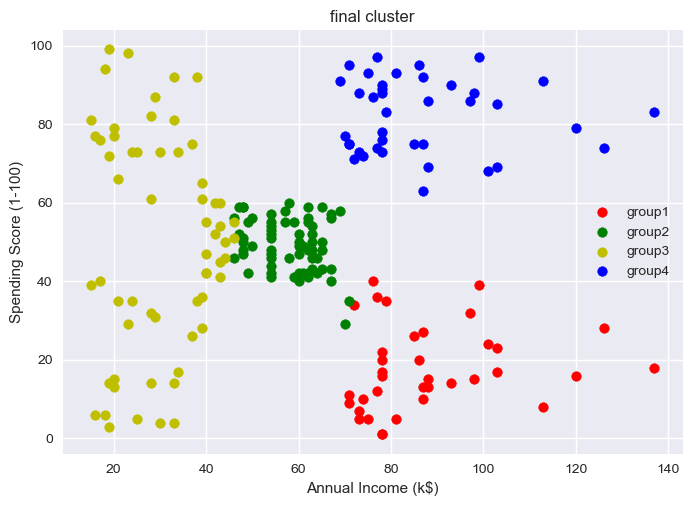

In [73]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='r',label='group1') 
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='g',label='group2')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='y',label='group3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='b',label='group4')
plt.title('final cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

# Analysis data

In [74]:
data

,Genre,CustomerID,Age,Annual Income (k$),Spending Score (1-100),k_means
0,1,1,19,15,39,1
1,1,2,21,15,81,1
2,0,3,20,16,6,1
3,0,4,23,16,77,1
4,0,5,31,17,40,1
...,...,...,...,...,...,...
195,0,196,35,120,79,3
196,0,197,45,126,28,0
197,1,198,32,126,74,3
198,1,199,32,137,18,0


In [75]:
x=data.Age
y=data['k_means'].value_counts()

In [76]:
colors=['r','g','b','y']
labels=['g1','g2','g3','g4']

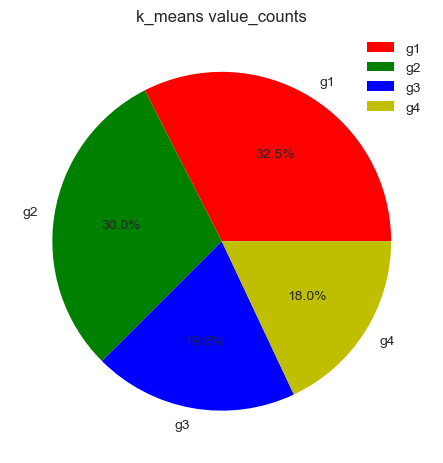

In [77]:
plt.pie(y,autopct='%0.1f%%',labels=labels,colors=colors)
plt.legend()
plt.title('k_means value_counts')
plt.show
plt.style.use('seaborn')

Text(0.5, 1.0, 'age')

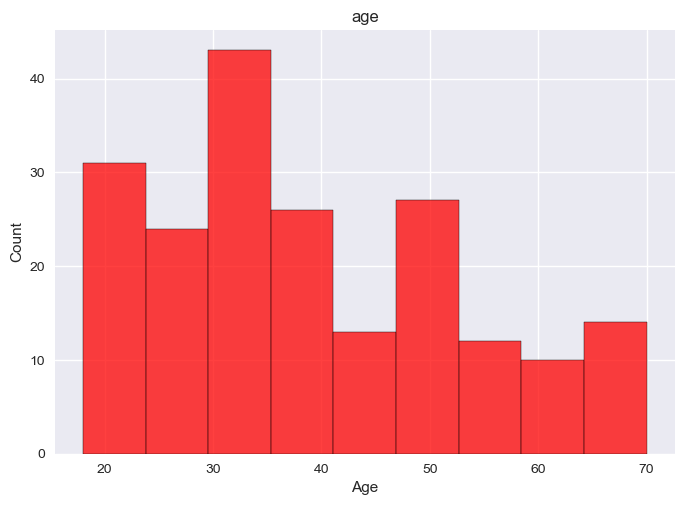

In [78]:
sns.histplot(x,color='r')
plt.title('age')

<Axes: xlabel='Genre', ylabel='count'>

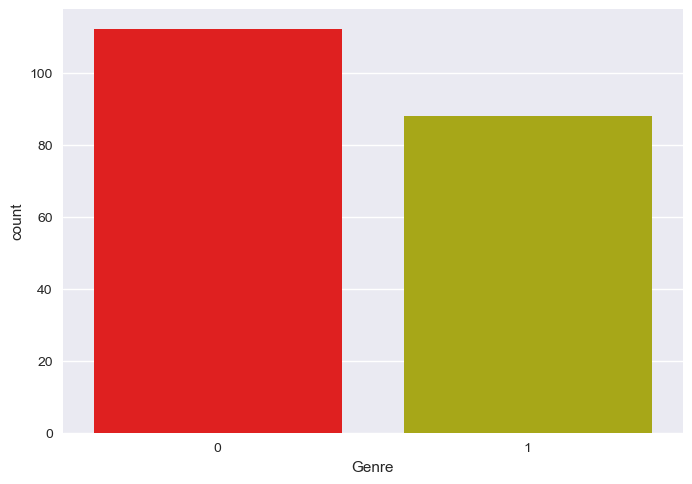

In [79]:
sns.countplot(data=data,x='Genre',palette=['r','y'])